# Author: Kumar R.

Agenda: Classification of the images either cat or dog. 

In [ ]:
#To run in CPU in a GPU ENabled Device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [1]:
#import the required 
import tensorflow as tf
import numpy as np

In [ ]:
#If you want to read from the zip file.
import zipfile as zip
zipfile = zip.ZipFile('cats_and_dogs.zip', 'r')
zipfile.extractall('cats_and_dogs')

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
#Define Path for train data and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation'

In [7]:
# All images will be rescaled by 1./255. The intensities will be in the range of 0 -255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary', #Cats and Dogs
                                                    target_size=(64, 64))   #Standard Practice  -- Boolean Alegbra Values like 1 2 4 8 16
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary', #Binary classification
                                                         target_size = (64, 64))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


There are 2000 images of cats and dogs in training set and 1000 images of cat and dog in testing dataset

In [8]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

# Step 1 - Convolution  #No of Feature Maps, Filter, color image with channel,
classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling 
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(tf.keras.layers.Flatten())

# Step 4 - Full connection
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu' , kernel_regularizer=tf.keras.regularizers.l1(0.001)))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu' , kernel_regularizer=tf.keras.regularizers.l1(0.001)))
classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
result = classifier.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=100,   #NumberofImages = BatchSize*StepsPerEpoch
                              epochs=20,
                              validation_steps=50,   #NumberofImages = BatchSize*StepsPerEpoch
                              verbose=2)

Epoch 1/20
100/100 - 652s - loss: 3.4568 - accuracy: 0.5025 - val_loss: 2.7690 - val_accuracy: 0.5000
Epoch 2/20
100/100 - 9s - loss: 2.9420 - accuracy: 0.4850 - val_loss: 2.7344 - val_accuracy: 0.5000
Epoch 3/20
100/100 - 9s - loss: 2.9192 - accuracy: 0.4975 - val_loss: 2.7248 - val_accuracy: 0.5000
Epoch 4/20
100/100 - 9s - loss: 2.9067 - accuracy: 0.4860 - val_loss: 2.7125 - val_accuracy: 0.5000
Epoch 5/20
100/100 - 9s - loss: 2.8926 - accuracy: 0.5030 - val_loss: 2.7005 - val_accuracy: 0.5000
Epoch 6/20
100/100 - 9s - loss: 2.8762 - accuracy: 0.4890 - val_loss: 2.6854 - val_accuracy: 0.5000
Epoch 7/20
100/100 - 9s - loss: 2.8580 - accuracy: 0.4920 - val_loss: 2.6683 - val_accuracy: 0.5000
Epoch 8/20
100/100 - 9s - loss: 2.8391 - accuracy: 0.4970 - val_loss: 2.6511 - val_accuracy: 0.5000
Epoch 9/20
100/100 - 9s - loss: 2.8195 - accuracy: 0.4800 - val_loss: 2.6351 - val_accuracy: 0.5000
Epoch 10/20
100/100 - 9s - loss: 2.7996 - accuracy: 0.4770 - val_loss: 2.6156 - val_accuracy: 0.50

Text(0.5, 1.0, 'Training and validation accuracy')

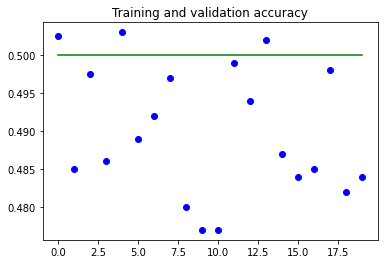

In [12]:
import matplotlib.pyplot as plt
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')

In [15]:
imageLocation = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation/dogs/dog.2000.jpg'
#Load the Image
imageLoad = tf.keras.preprocessing.image.load_img(imageLocation , target_size=(64,64))
#Convert Image to Array
imageArray = tf.keras.preprocessing.image.img_to_array(imageLoad)
#Model Expects Image Input in the form of Batch
imageCompatibleIp = np.array([imageArray])
#The Batch can be given as an input to model
pred = classifier.predict(imageCompatibleIp)
#
if pred == 0:
    print("Cat")
else:
    print("Dog")



Dog


### Following the below methods to increase the accuracy of the model

# Test 1

In [18]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Define Path for train data and test data
train_dir = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation/'

#Build a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 - 12s - loss: 0.6903 - acc: 0.5185 - val_loss: 0.6730 - val_acc: 0.5770
Epoch 2/20
100/100 - 11s - loss: 0.6624 - acc: 0.6045 - val_loss: 0.6568 - val_acc: 0.6190
Epoch 3/20
100/100 - 11s - loss: 0.6261 - acc: 0.6520 - val_loss: 0.6094 - val_acc: 0.6800
Epoch 4/20
100/100 - 11s - loss: 0.5875 - acc: 0.6915 - val_loss: 0.6255 - val_acc: 0.6570
Epoch 5/20
100/100 - 11s - loss: 0.5478 - acc: 0.7185 - val_loss: 0.5688 - val_acc: 0.7000
Epoch 6/20
100/100 - 11s - loss: 0.5127 - acc: 0.7520 - val_loss: 0.5588 - val_acc: 0.7020
Epoch 7/20
100/100 - 11s - loss: 0.4818 - acc: 0.7770 - val_loss: 0.5893 - val_acc: 0.6910
Epoch 8/20
100/100 - 11s - loss: 0.4640 - acc: 0.7705 - val_loss: 0.5501 - val_acc: 0.7290
Epoch 9/20
100/100 - 11s - loss: 0.4385 - acc: 0.8020 - val_loss: 0.5591 - val_acc: 0.7170
Epoch 10/20
100/100 - 11s - loss: 0.4122 - acc: 0.8100 - val_loss: 0.5921 - val_acc: 0.7090
Epoch 11/20
100/100 - 11s - loss: 0.3900 - acc: 0.8240 - val_loss: 0.5346 - val_acc: 0.74

Text(0.5, 1.0, 'Training and validation accuracy')

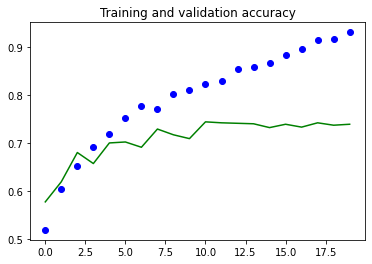

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')

# Test 2

In [35]:
#Import the libraries
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Build a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#Compile
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])


# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation. 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 - 20s - loss: 0.6943 - acc: 0.5125 - val_loss: 0.6854 - val_acc: 0.5000
Epoch 2/20
100/100 - 19s - loss: 0.6821 - acc: 0.5700 - val_loss: 0.6562 - val_acc: 0.6490
Epoch 3/20
100/100 - 19s - loss: 0.6629 - acc: 0.5950 - val_loss: 0.6338 - val_acc: 0.6520
Epoch 4/20
100/100 - 19s - loss: 0.6537 - acc: 0.6010 - val_loss: 0.6885 - val_acc: 0.5510
Epoch 5/20
100/100 - 20s - loss: 0.6370 - acc: 0.6355 - val_loss: 0.5881 - val_acc: 0.6900
Epoch 6/20
100/100 - 19s - loss: 0.6140 - acc: 0.6505 - val_loss: 0.5851 - val_acc: 0.6880
Epoch 7/20
100/100 - 19s - loss: 0.6049 - acc: 0.6605 - val_loss: 0.5712 - val_acc: 0.6870
Epoch 8/20
100/100 - 19s - loss: 0.6044 - acc: 0.6645 - val_loss: 0.5720 - val_acc: 0.6760
Epoch 9/20
100/100 - 19s - loss: 0.5940 - acc: 0.6710 - val_loss: 0.5446 - val_acc: 0.7110
Epoch 10/20
100/100 - 19s - loss: 0.5872 - acc: 0.6845 - val_loss: 0.5671 - val_acc: 0.6890
Epoch 11/20
100/100 - 19s - loss: 0.5857 - acc: 0.6790 - val_loss: 0.5599 - val_acc: 0.70

Text(0.5, 1.0, 'Training and validation accuracy')

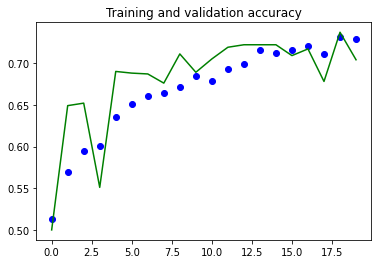

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')

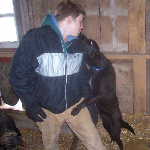

In [37]:
#prediction - 1
image_loc = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation/dogs/dog.2003.jpg'
#load the image
image_load = tf.keras.preprocessing.image.load_img(image_loc, target_size=(150,150))
#Convert image to array
image_aray = tf.keras.preprocessing.image.img_to_array(image_load)
#Batch array
image_batch = np.array([image_aray])
image_load

In [38]:
#Predicting the classification of image.
predi = model.predict(image_batch)
prediction = (model.predict(image_batch)>0.5).astype('int32')
print('predicted value: ',predi)
print('predicted class: ',prediction)
print("")
if prediction==0:
  print("It's a Cat")
else:
  print('Its a Dog')

predicted value:  [[1.]]
predicted class:  [[1]]

Its a Dog


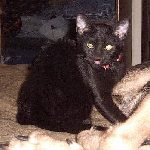

In [46]:
#prediction - 1
image_loc = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation/cats/cat.2005.jpg'
#load the image
image_load = tf.keras.preprocessing.image.load_img(image_loc, target_size=(150,150))
#Convert image to array
image_aray = tf.keras.preprocessing.image.img_to_array(image_load)
#Batch array
image_batch = np.array([image_aray])
image_load

In [47]:
#Predicting the classification of image.
predi = model.predict(image_batch)
prediction = (model.predict(image_batch)>0.5).astype('int32')
print('predicted value: ',predi)
print('predicted class: ',prediction)
print("")
if prediction==0:
  print("It's a Cat")
else:
  print('Its a Dog')

predicted value:  [[4.093167e-11]]
predicted class:  [[0]]

It's a Cat
